# 1. Regularization

In [1]:
# Import necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [2]:
# Read Data
hitters = pd.read_csv("Hitters.csv", sep=",")
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Drop missing value and the first column
df = hitters.dropna().drop(hitters.columns[0], axis=1)

# Drop categorical variables and label salary as y
df = df.drop(['League', 'Division', 'NewLeague'], axis=1)
y = df['Salary']
df = df.drop(['Salary'], axis=1)
x = df.astype('float64')

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

### 1.1 LASSO Regression

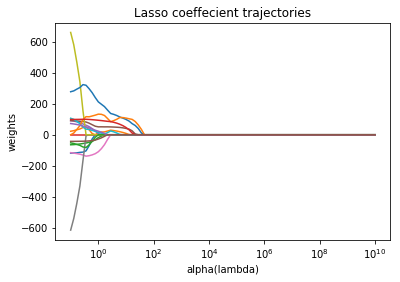

AtBat     -118.870243
Hits        22.472088
HmRun      -64.761569
Runs         0.000000
RBI         91.080419
Walks       90.886246
Years     -115.731580
CAtBat    -615.415392
CHits      660.029636
CHmRun     106.229270
CRuns      277.483802
CRBI         0.000000
CWalks     -52.490417
PutOuts     98.429202
Assists     72.224822
Errors     -42.862019
dtype: float64

In [4]:
# Fit to lasso
lasso = Lasso(max_iter=10000, normalize=True)
lasso_coefs = []
alphas = 10**np.linspace(10, -1, 100)*0.5

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(x_train), y_train)
    lasso_coefs.append(lasso.coef_)
    
# Visualize the coefficients
ax = plt.gca()
ax.plot(alphas*2, lasso_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha(lambda)')
plt.ylabel('weights')
plt.title('Lasso coeffecient trajectories')
plt.show()

# Coefficients for variables
pd.Series(lasso.coef_, index=x.columns)

In [5]:
# Fit lasso with cross validation
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(x_train, y_train)
# Optimal value of penalty 
print(lassocv.alpha_)

# Use optimal alpha to fit
lasso2 = Lasso(max_iter=10000, normalize=True)
lasso2.set_params(alpha = lassocv.alpha_)
lasso2.fit(x_train, y_train)
print(mean_squared_error(y_test, lasso2.predict(x_test)))

# Coefficients for variables, some are reduced to zero.
pd.Series(lasso2.coef_, index=x.columns)

0.5285158176886349
135362.5771343597


AtBat      -0.000000
Hits        0.342941
HmRun      -1.763379
Runs        0.000000
RBI         0.099987
Walks       2.343514
Years     -23.104629
CAtBat     -0.000000
CHits       0.000000
CHmRun      0.173988
CRuns       0.673893
CRBI        0.437540
CWalks     -0.000000
PutOuts     0.323568
Assists     0.140480
Errors     -3.898619
dtype: float64

The final three predictors in the model is Years, Errors and Walks.

The optimal value of the regularization penalty is 0.5285158176886349.

After cross validation, 12 predictors are remained in the model.

### 1.2 Ridge Regression

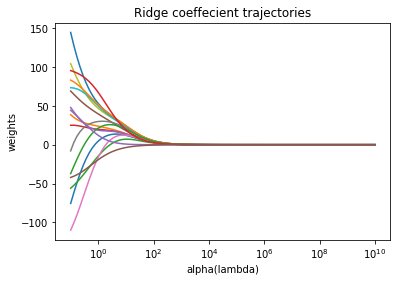

AtBat      -75.694507
Hits        38.609991
HmRun      -56.087355
Runs        25.028498
RBI         48.006686
Walks       69.122779
Years     -110.068445
CAtBat      -7.929000
CHits      104.375257
CHmRun      73.447877
CRuns      144.671451
CRBI        83.242109
CWalks     -37.252629
PutOuts     95.521253
Assists     44.386486
Errors     -42.176978
dtype: float64

In [6]:
# Fit to ridge
ridge = Ridge(max_iter=10000, normalize=True)
ridge_coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(scale(x_train), y_train)
    ridge_coefs.append(ridge.coef_)
    
# Visualize the coefficients
ax = plt.gca()
ax.plot(alphas*2, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha(lambda)')
plt.ylabel('weights')
plt.title('Ridge coeffecient trajectories')
plt.show()

# Coefficients for variables
pd.Series(ridge.coef_, index=x.columns)

In [7]:
# Fit ridge with cross validation
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(x_train, y_train)
# Optimal value of penalty 
print(ridgecv.alpha_)

# Use optimal alpha to fit
ridge2 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge2.fit(x_train, y_train)
print(mean_squared_error(y_test, ridge2.predict(x_test)))

# Coefficients for variables, some are reduced to zero.
pd.Series(ridge2.coef_, index=x.columns)

0.05
130341.27221942646


AtBat      -0.511102
Hits        0.870621
HmRun      -6.617805
Runs        0.994180
RBI         1.849129
Walks       3.163345
Years     -24.053182
CAtBat     -0.003698
CHits       0.173854
CHmRun      0.946975
CRuns       0.470156
CRBI        0.270219
CWalks     -0.151634
PutOuts     0.332808
Assists     0.290937
Errors     -6.265540
dtype: float64

The optimal value of the regularization penalty is 0.05.

# 2. Short Answer

Bias is the difference between the value of model prediction and the true value, variance is the variability of model prediction for a data point, measures how far a set of numbers are spread out from their average value. The model would have higher variance when it has a lower bias.

Regularization on the coefficients can control the variance, we can shrink coefficient estimates to reduce the size of terms in the model, thus decreasing the variance, but increasing the bias.

In number (1), we use shrinkage parameter(alpha) to control the size of regularization. When alpha gets larger, the model will have more penaty, thus decreasing the variance, but increasing the bias. When it gets smaller, the model would have lower penalty, so the variance would increase, bias would decrease. From the graphs, we can see that more features are in the model when alpha is smaller, model is with higher variance but lower bias now, and vice versa.